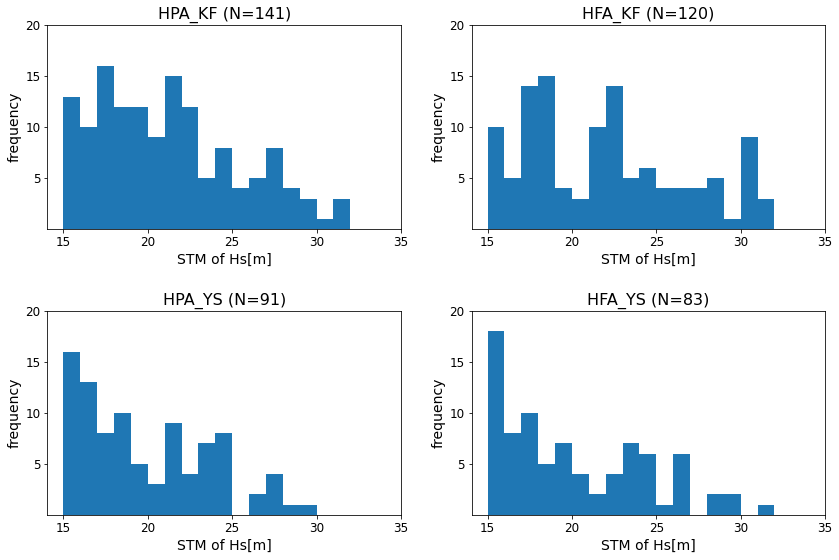

In [19]:
"""
イベントごとの空間最大値が起きた場所・その規模をプロットする.
"""

from csv import reader
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as ticker
import math
import numpy as np

# 緯度経度の設定
with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

fig = plt.figure(figsize=(12, 8))

MODEL = ['KF', 'YS']

for model_num in range(len(MODEL)):
    for num in range(2):
        model = MODEL[model_num]
        if num == 0:
            model = 'HPA_' + model
        else:
            model = 'HFA_' + model + '_c0'

        with open('../Ex_csv/' + model + '_STM.csv', 'r') as csv_file:
            csv_reader = reader(csv_file)
            STM = list(csv_reader)

        STM = [float(val[0]) for val in STM]
        ax = fig.add_subplot(2, 2, 2 * model_num + num + 1)
        edges = np.arange(15, 35)
        ax.hist(STM, bins=edges)
        ax.set_title(model[:6] + ' (N=' + str(len(STM)) + ')', fontsize=16)
        ax.set_xlabel("STM of Hs[m]", fontsize=14)
        ax.set_ylabel("frequency", fontsize=14)
        ax.set_xticks([15, 20, 25, 30, 35])
        ax.set_yticks([5, 10, 15, 20])
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.95, hspace=0.4)
plt.savefig("../img/hist_of_tc.png")
plt.show()